<a href="https://colab.research.google.com/github/Chanyoungkim1024/ML_2021/blob/ML_2021/%EC%BD%94%EB%A1%9C%EB%82%98%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [5]:
from matplotlib import font_manager, rc
font_manager._rebuild()

In [6]:
font_name = font_manager.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').get_name()
rc('font', family=font_name)
plt.rc('font', size=12)

In [7]:
%pwd

'/content'

In [8]:
%cd /content/drive/

/content/drive


In [9]:
cd "MyDrive"

/content/drive/MyDrive


In [10]:
cd "covid_data"

/content/drive/MyDrive/covid_data


In [11]:
%pwd

'/content/drive/MyDrive/covid_data'

In [12]:
#matplotlib inline
# 1. 코로나 발생 이후, 연령별 카테고리의 cgi 평균수치의 감소가 보일것으로 추측.
# 2. 소극적인 소비행태로 인해 cgi 지수 감소도 기록될 것으로 추측.

In [13]:
delivery = pd.read_csv("./delivery.csv")
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,철산동,NaN,4121061000,4.121030e+11,1.154510e+09,서울특별시,금천구,가산동,NaN,1.154551e+09,1.154531e+11,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4.115010e+09,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115043e+11,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,행신동,NaN,4128164000,4.128144e+11,4.128110e+09,경기도,고양시 덕양구,주교동,NaN,4.128151e+09,4.128144e+11,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


In [14]:
time = pd.read_csv("./COVID_19/Time.csv")
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [15]:
index = pd.read_csv("./index.csv")
index.head()

,period,catl,catm,age,gender,sido,sigungu,cgi
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595


In [16]:
# date별 코로나 확진자 수

Text(0.5, 1.0, 'Confirmed by date')

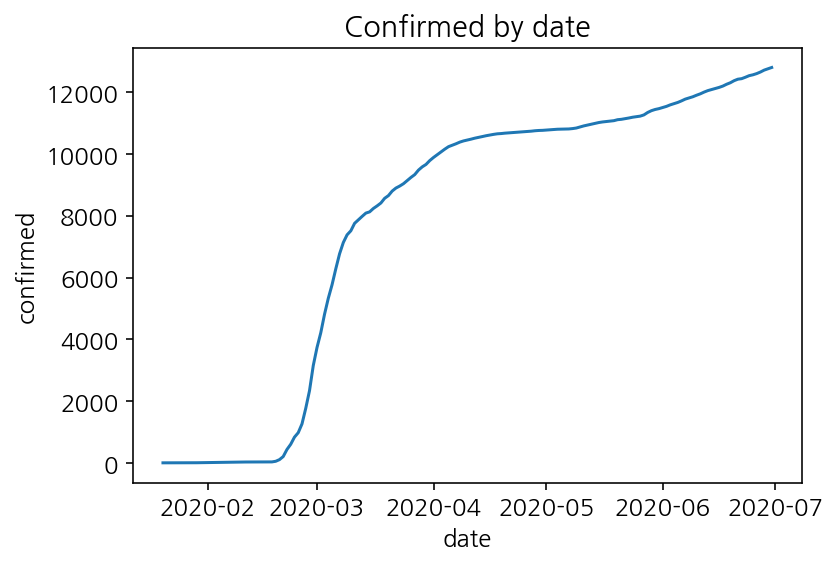

In [17]:
time.date = pd.to_datetime(time.date)
sns.lineplot(x="date", y="confirmed", data = time)
plt.title("Confirmed by date")

2019년을 코로나 이전, 2020년을 코로나 이후로 설정함


In [19]:
#2019년의 데이터만 뽑기 위해 마지막 달인 12월까지 몇행인지 도출
np.where(index.period == 201912)

(array([82608, 82609, 82610, ..., 90125, 90126, 90127]),)

In [20]:
#다시, year이라는 컬럼을 추가해 년만 표시되게 하기

In [21]:
period_list = index.period.astype(str).tolist()

In [22]:
year_list = []
for i in period_list:
    year_list.append(i[0:4])

In [23]:
index["year"] = year_list
index

,period,catl,catm,age,gender,sido,sigungu,cgi,year
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,2019
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,2019
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,2019
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,2019
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,2019
...,...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660,2020
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865,2020
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402,2020
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600,2020


In [24]:
#코로나 이전(2019년) 데이터만 뽑기 위해 조건 설정

In [25]:
last_year = index[index["year"] == '2019']
last_year

,period,catl,catm,age,gender,sido,sigungu,cgi,year
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,2019
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,2019
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,2019
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,2019
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,2019
...,...,...,...,...,...,...,...,...,...
90123,201912,화장품,화장품,all,all,서울,all,72.688013,2019
90124,201912,화장품,화장품,all,all,서울,강동구,111.745516,2019
90125,201912,화장품,화장품,all,all,서울,서대문구,24.279394,2019
90126,201912,화장품,화장품,all,all,서울,서초구,25.715134,2019


In [26]:
#코로나 이후(2020년) 데이터

In [27]:
now_year = index[index["year"] == '2020']
now_year

,period,catl,catm,age,gender,sido,sigungu,cgi,year
90128,202001,건강/의료용품,건강관리용품,20,F,서울,all,101.080460,2020
90129,202001,건강/의료용품,건강관리용품,20,F,서울,강동구,142.598266,2020
90130,202001,건강/의료용품,건강관리용품,20,F,서울,광진구,92.484593,2020
90131,202001,건강/의료용품,건강관리용품,20,F,서울,구로구,162.756403,2020
90132,202001,건강/의료용품,건강관리용품,20,F,서울,양천구,77.568793,2020
...,...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660,2020
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865,2020
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402,2020
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600,2020


In [28]:
# 2019년의 연령대별 품목별 cgi의 평균값

In [29]:
last_mean = last_year.groupby(['year', 'age', 'catl']).mean()
last_mean = last_mean.drop(columns = 'period')
last_mean

cgi
year age catl               
2019 20  건강/의료용품  129.885245
         식품       118.586497
         일용품      125.029549
         화장품      120.923962
     30  건강/의료용품   95.776843
         식품       101.027994
         일용품       99.908279
         화장품       93.591992
     40  건강/의료용품  104.186269
         식품        99.451845
         일용품       96.973864
         화장품       88.120565
     50  건강/의료용품  104.197599
         식품       101.345769
         일용품       92.956185
         화장품       86.100039
     60  건강/의료용품  113.988335
         식품       102.282403
         일용품      100.047142
         화장품       92.799079
     all 건강/의료용품  103.287897
         식품       101.287899
         일용품       95.536417
         화장품       87.280067

In [30]:
#2020년의 연령대별 품목별 cgi의 평균값

In [31]:
now_mean = now_year.groupby(['year', 'age', 'catl']).mean()
now_mean = now_mean.drop(columns = 'period')
now_mean

cgi
year age catl               
2020 20  건강/의료용품  125.643626
         식품       112.201102
         일용품      104.349345
         화장품       94.520504
     30  건강/의료용품   85.074590
         식품        87.849004
         일용품       70.823055
         화장품       87.529506
     40  건강/의료용품   91.254463
         식품        88.175043
         일용품       79.965584
         화장품       65.652442
     50  건강/의료용품   95.223442
         식품        91.623447
         일용품       76.642391
         화장품       70.240234
     60  건강/의료용품   93.147133
         식품        91.330089
         일용품       86.947310
         화장품       79.629638
     all 건강/의료용품   91.544952
         식품        89.828966
         일용품       78.400660
         화장품       72.365893

In [32]:
#2019년의 연령대별 품목별 cgi평균의 시각화

In [33]:
last_mean1 = pd.pivot_table(
    last_mean,
    index = "age",
    columns = "catl",
    values = "cgi",
    aggfunc = "mean"
)
last_mean1

catl,건강/의료용품,식품,일용품,화장품
age,,,,
20,129.885245,118.586497,125.029549,120.923962
30,95.776843,101.027994,99.908279,93.591992
40,104.186269,99.451845,96.973864,88.120565
50,104.197599,101.345769,92.956185,86.100039
60,113.988335,102.282403,100.047142,92.799079
all,103.287897,101.287899,95.536417,87.280067


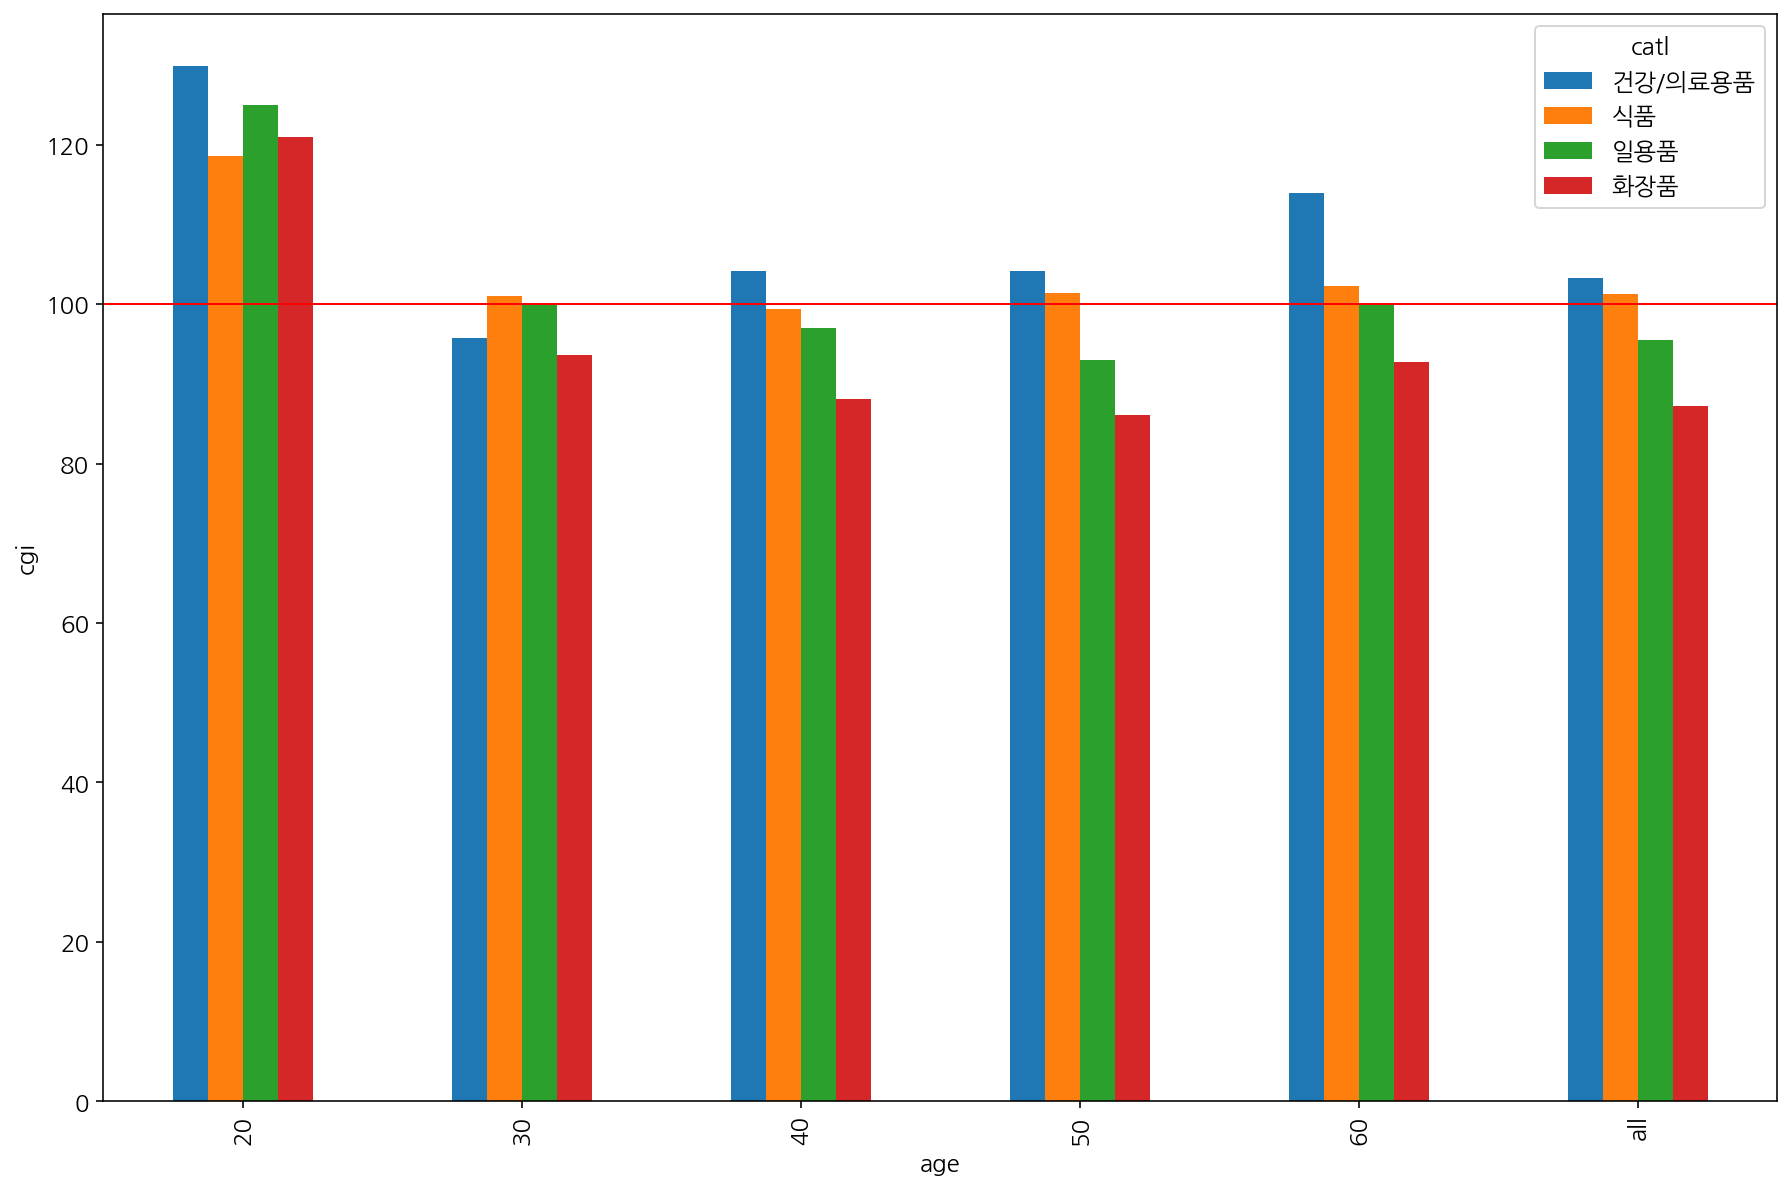

In [34]:
ax = last_mean1.plot.bar()
fig = ax.get_figure()
fig.set_size_inches(15,10)
ax.set_xlabel("age")
ax.set_ylabel("cgi")
plt.axhline(y=100, color='r', linewidth=1)
plt.show()

In [35]:
#2020년의 연령대별 품목별 cgi의 시각화

In [36]:
now_mean1 = pd.pivot_table(
    now_mean,
    index = "age",
    columns = "catl",
    values = "cgi",
    aggfunc = "mean"
)
now_mean1

catl,건강/의료용품,식품,일용품,화장품
age,,,,
20,125.643626,112.201102,104.349345,94.520504
30,85.074590,87.849004,70.823055,87.529506
40,91.254463,88.175043,79.965584,65.652442
50,95.223442,91.623447,76.642391,70.240234
60,93.147133,91.330089,86.947310,79.629638
all,91.544952,89.828966,78.400660,72.365893


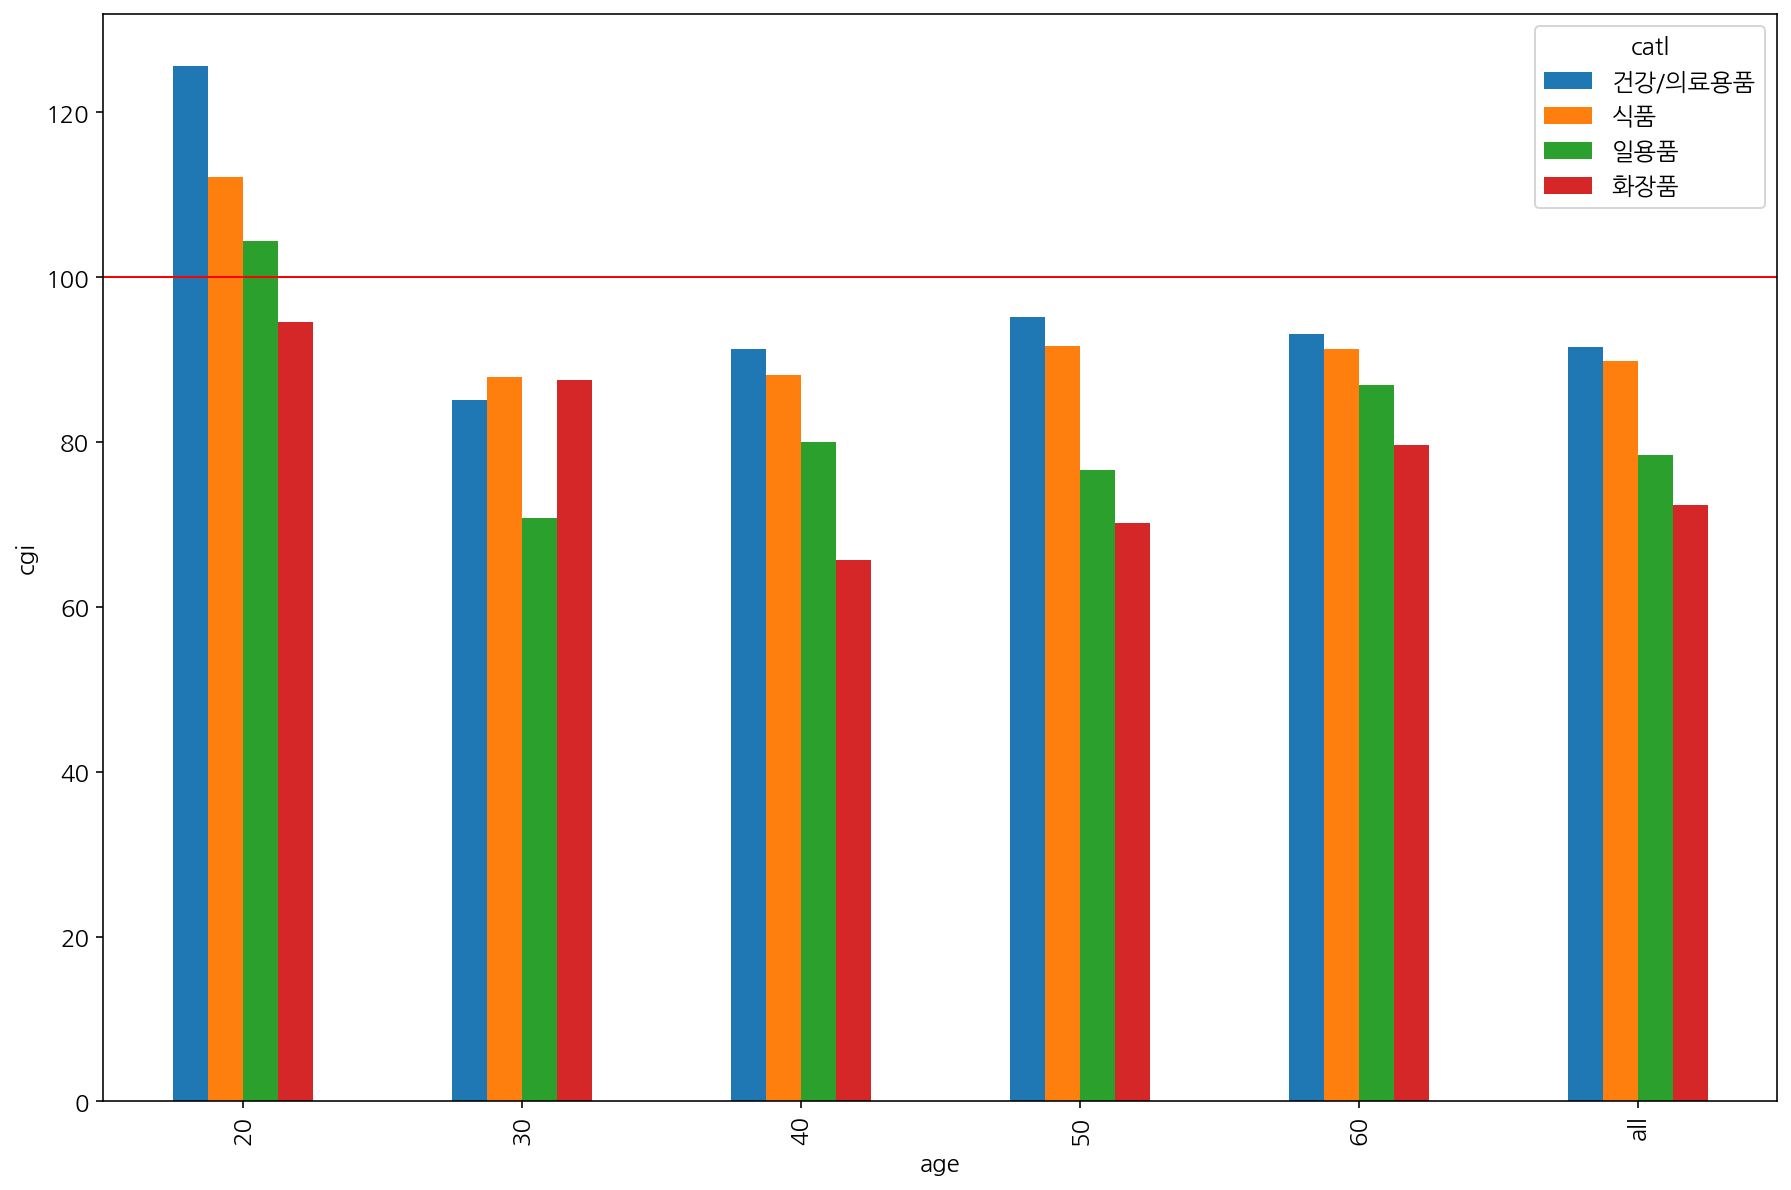

In [37]:
ax = now_mean1.plot.bar()
fig = ax.get_figure()
fig.set_size_inches(15,10)
ax.set_xlabel("age")
ax.set_ylabel("cgi")
plt.axhline(y=100, color='r', linewidth=1)
plt.show()

In [38]:
#연령별로 나눠서 보기로 결정

In [206]:
last_mean20 = last_mean1.iloc[[0],:]
now_mean20 = now_mean1.iloc[[0],:]
result20 = pd.concat([last_mean20, now_mean20])

last_mean30 = last_mean1.iloc[[1],:]
now_mean30 = now_mean1.iloc[[1],:]
result30 = pd.concat([last_mean30, now_mean30])

last_mean40 = last_mean1.iloc[[2],:]
now_mean40 = now_mean1.iloc[[2],:]
result40 = pd.concat([last_mean40, now_mean40])

last_mean50 = last_mean1.iloc[[3],:]
now_mean50 = now_mean1.iloc[[3],:]
result50 = pd.concat([last_mean50, now_mean50])

last_mean60 = last_mean1.iloc[[4],:]
now_mean60 = now_mean1.iloc[[4],:]
result60 = pd.concat([last_mean60, now_mean60])


In [ ]:
# 20대 cgi 비교

(0.0, 140.0)

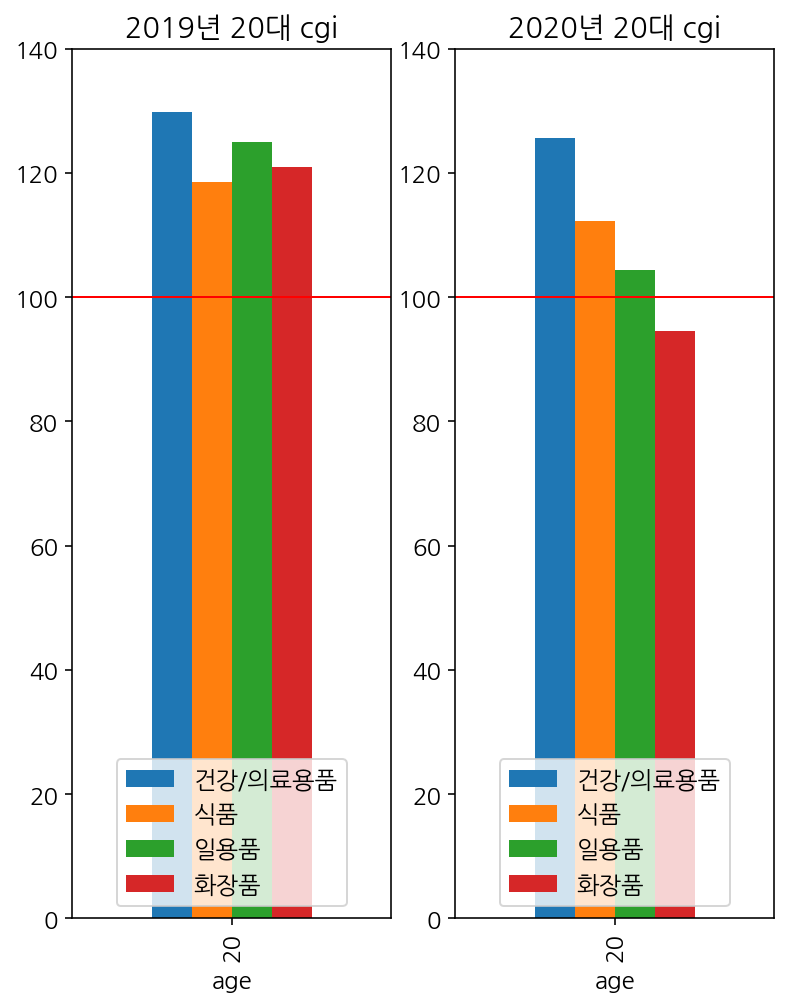

In [200]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)


axes[0].set_title("2019년 20대 cgi")
axes[1].set_title("2020년 20대 cgi")
last_mean20.plot(ax=axes[0], kind= 'bar')
now_mean20.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.1)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,140)
axes[1].set_ylim(0,140)

In [ ]:
## 화장품의 매출이 확연히 감소한 것으로 사료됨.

In [ ]:
#30대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

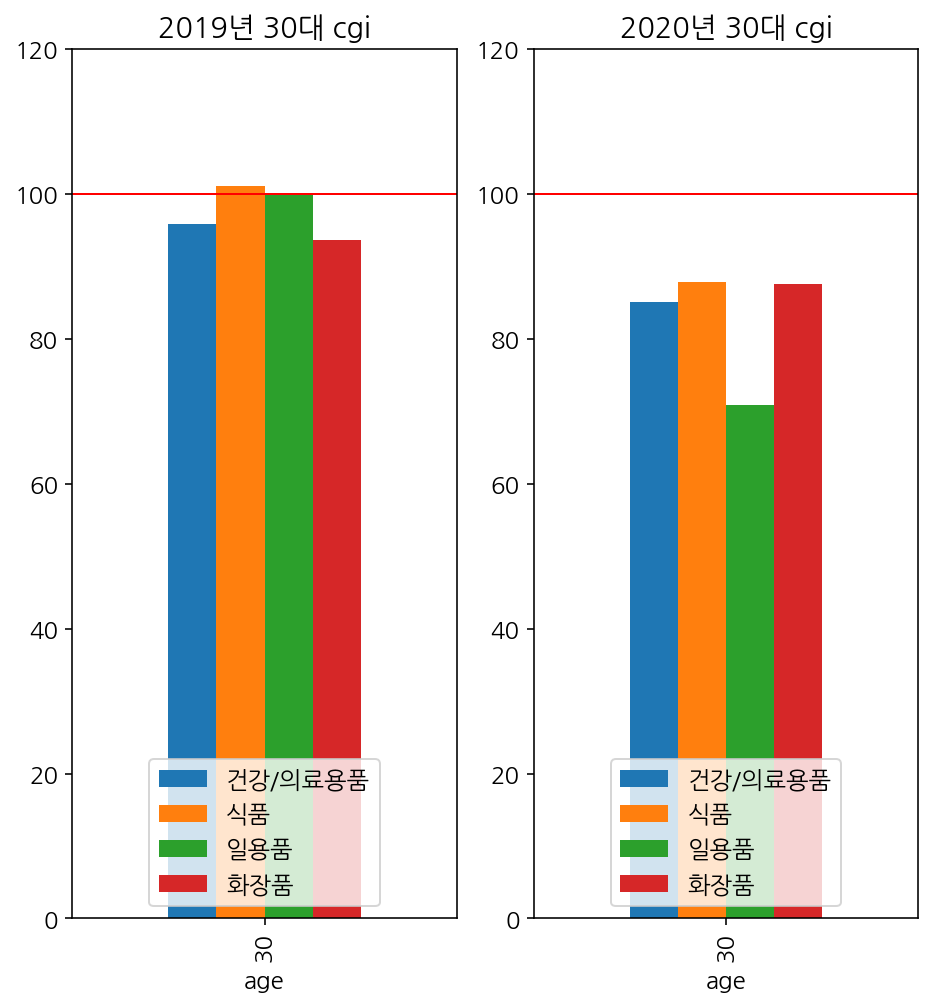

In [202]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 30대 cgi")
axes[1].set_title("2020년 30대 cgi")
axes[0].legend(loc = "lower center")
last_mean30.plot(ax=axes[0], kind= 'bar')
now_mean30.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [ ]:
## 모든 품목의 매출이 일제히 줄었으며, 특히 일용품의 매출이 눈에 띄게 감소함.

In [ ]:
#40대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

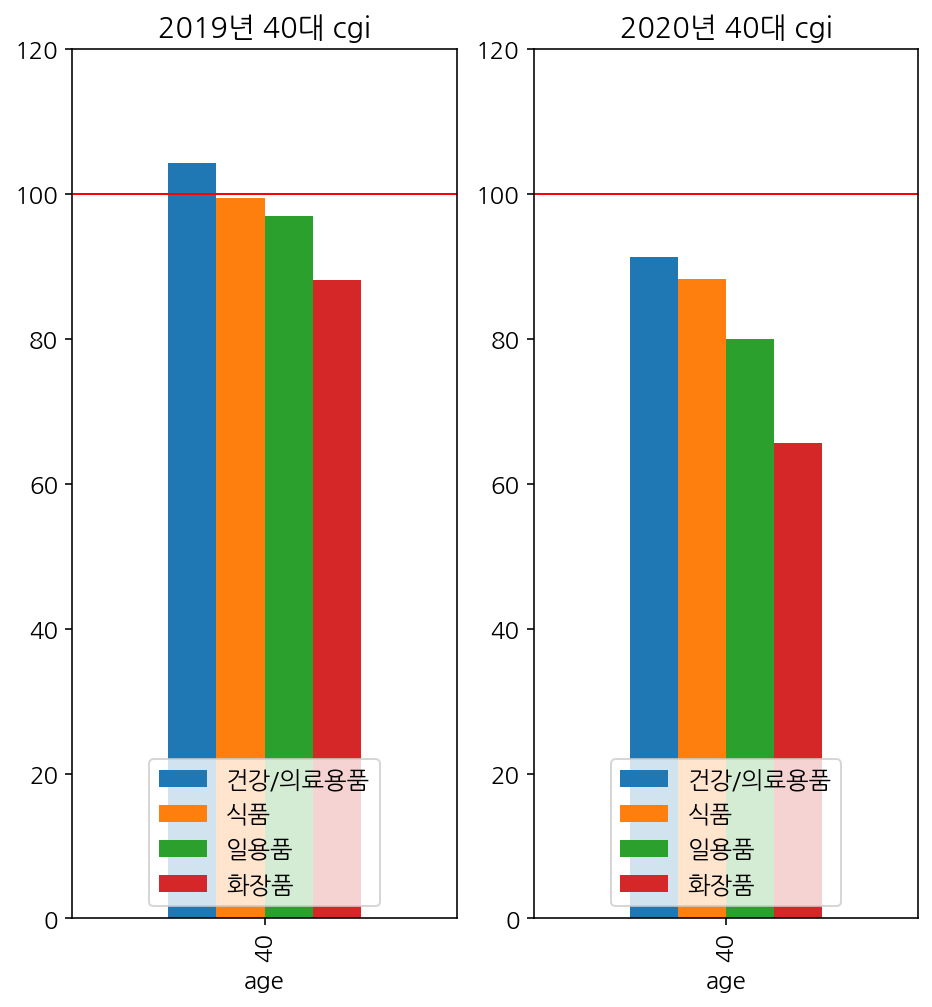

In [203]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 40대 cgi")
axes[1].set_title("2020년 40대 cgi")
axes[0].legend(loc = "lower center")
last_mean40.plot(ax=axes[0], kind= 'bar')
now_mean40.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [ ]:
## 모든 품목의 매출이 하락함.

In [ ]:
#50대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

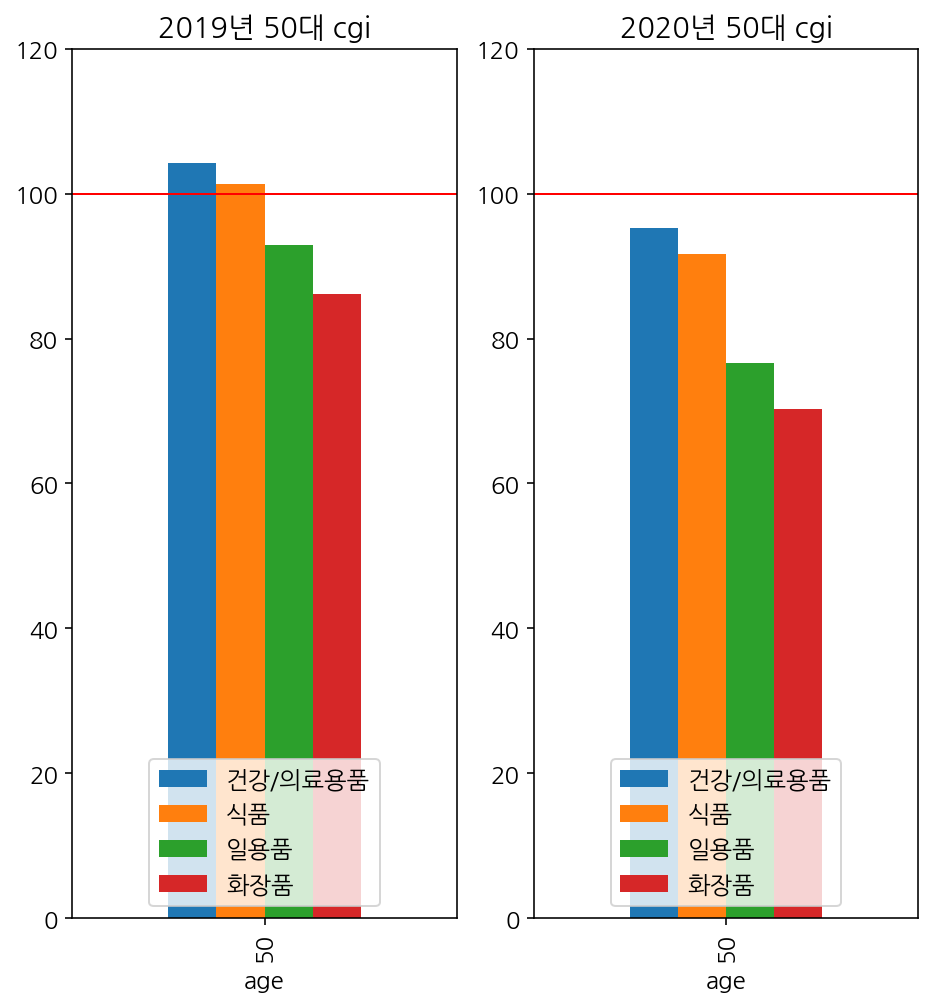

In [204]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 50대 cgi")
axes[1].set_title("2020년 50대 cgi")
axes[0].legend(loc = "lower center")
last_mean50.plot(ax=axes[0], kind= 'bar')
now_mean50.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [ ]:
##모든 품목의 매출이 하락함.

In [ ]:
#60대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

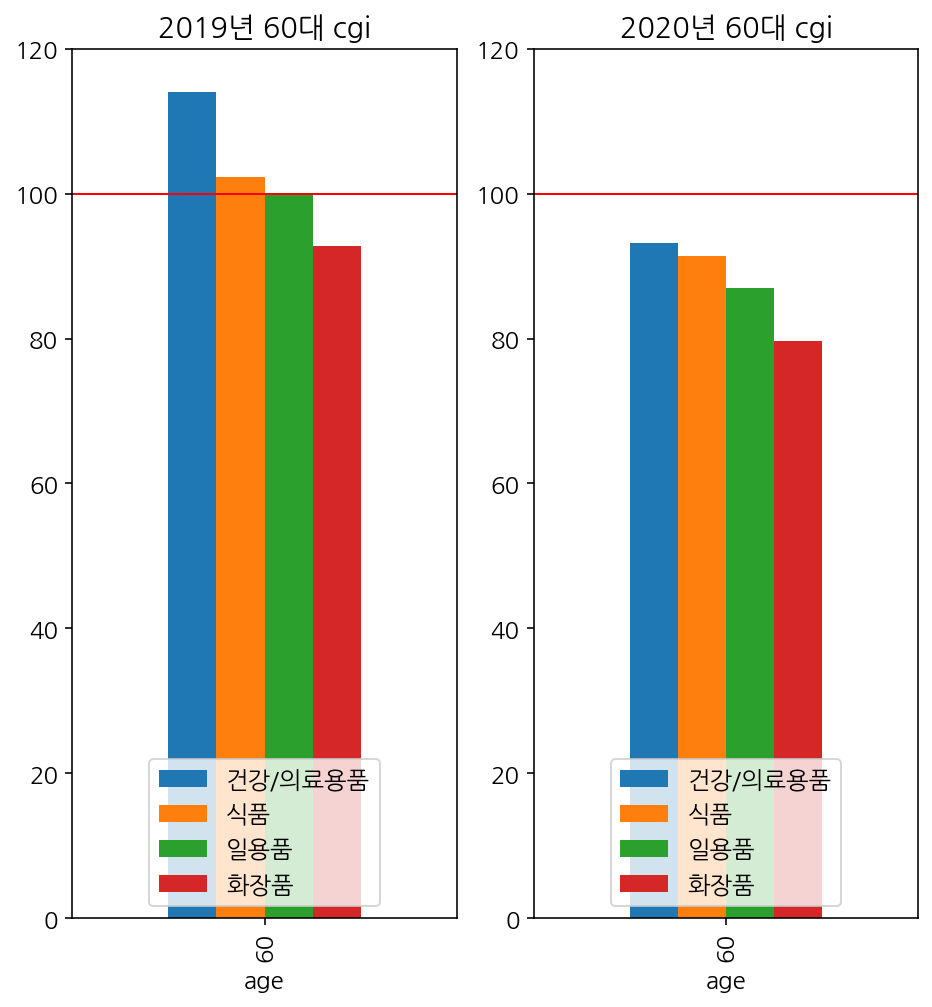

In [205]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 60대 cgi")
axes[1].set_title("2020년 60대 cgi")
axes[0].legend(loc = "lower center")
last_mean60.plot(ax=axes[0], kind= 'bar')
now_mean60.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [ ]:
## 모든 품목의 매출이 하락함.

2018년 대비 코로나 이후 cgi 지수는 일제히 감소했지만 특정 품목에 대해서 눈에띄게 감소한 점은 특징지을 수 없음.